In [77]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import ssl


In [78]:
ssl._create_default_https_context = ssl._create_unverified_context
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [79]:
X_test.shape

(10000, 32, 32, 3)

In [80]:
y_train.shape

(50000, 1)

In [81]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [82]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [83]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [84]:
classes[9]

'truck'

In [85]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])

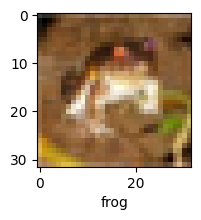

In [86]:
plot_sample(X_train, y_train, 0)

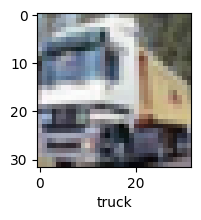

In [87]:
plot_sample(X_train, y_train, 1)

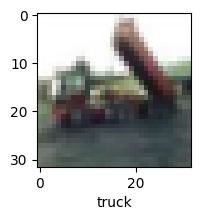

In [88]:
plot_sample(X_train, y_train, 2)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [89]:

ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/Users/vsalgia/Vivek/python_projects/AI/AILearning/DeepLearning/ImageClassCNN/.cifar10venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1020 - loss: nan
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.0995 - loss: nan
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.1006 - loss: nan
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.0999 - loss: nan
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.1015 - loss: nan


In [90]:
# New way of doing it
ann = models.Sequential()
ann.add(layers.Input(shape=(32,32,3)))
ann.add(layers.Flatten())
ann.add(layers.Dense(3000, activation='relu'))
ann.add(layers.Dense(1000, activation='relu'))
ann.add(layers.Dense(10, activation='sigmoid'))


ann.compile(optimizer='SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])


In [91]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.1006 - loss: nan
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.1014 - loss: nan
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1023 - loss: nan
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.0996 - loss: nan
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.0968 - loss: nan


In [92]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/Users/vsalgia/Vivek/python_projects/AI/AILearning/DeepLearning/ImageClassCNN/.cifar10venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vsalgia/Vivek/python_projects/AI/AILearning/DeepLearning/ImageClassCNN/.cifar10venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vsalgia/Vivek/python_projects/AI/AILearning/DeepLearning/ImageClassCNN/.cifar10venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defi

In [93]:
'''cnn = models.Sequential([
    #convolution layer
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', Input(shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    #
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])'''

# Create Model
cnn = models.Sequential()
cnn.add(layers.Input(shape=(32,32,3)))
# Convolution layer
cnn.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn.add(layers.MaxPooling2D((2,2)))

cnn.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn.add(layers.MaxPooling2D((2,2)))

# Dense
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

cnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3011 - loss: 3.2289
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5159 - loss: 1.3568
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5841 - loss: 1.1796
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6231 - loss: 1.0645
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6473 - loss: 0.9949
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6809 - loss: 0.9178
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6950 - loss: 0.8730
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7133 - loss: 0.8187
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7240 - loss: 0.7916
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7419 - loss: 0.7394


In [94]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6473 - loss: 1.0950


[1.0913984775543213, 0.6496999859809875]

In [95]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

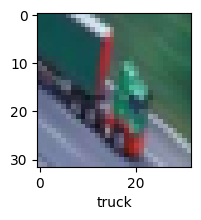

In [96]:
plot_sample(X_test, y_test, 50)

In [97]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[1.2891486e-04, 1.4679357e-06, 8.7580469e-04, 8.4582269e-01,
        2.1798590e-04, 1.3504334e-01, 1.2690716e-02, 4.9576847e-05,
        5.1690149e-03, 4.7997071e-07],
       [4.5802156e-03, 2.3552176e-02, 3.3488020e-06, 5.0309509e-06,
        1.0443850e-06, 6.3510142e-06, 8.4413710e-05, 5.4357332e-07,
        9.7174418e-01, 2.2701601e-05],
       [2.7856407e-01, 1.2868829e-01, 6.0291323e-03, 1.3417085e-02,
        3.0544933e-04, 2.3340592e-03, 1.4843839e-03, 2.4048788e-03,
        5.4698652e-01, 1.9786155e-02],
       [9.9919699e-02, 5.9305452e-04, 1.1143936e-03, 6.1421108e-04,
        4.4425443e-04, 7.2352392e-05, 9.0736132e-05, 2.1246324e-05,
        8.9707941e-01, 5.0642655e-05],
       [6.9084213e-05, 1.5290101e-05, 5.9084181e-02, 1.6818921e-01,
        7.4092053e-02, 2.0788796e-03, 6.9637471e-01, 6.4315464e-06,
        6.6616863e-05, 2.3445191e-05]], dtype=float32)

In [98]:
np.argmax(y_pred[0])

np.int64(3)

In [99]:
#list comprehension in python
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(8), np.int64(6)]

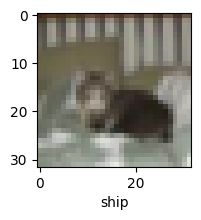

In [109]:
plot_sample(X_test, y_test, 150)

In [45]:
classes[y_classes[3]]

'airplane'